# Convolutional Neural Network

In [1]:
#from google.colab import drive
#rive.mount('/content/drive')


### Importing the libraries

In [2]:
!pip install tensorflow

    pytz>=2011n
        ~~~~~~^


In [3]:
!pip install pillow
!pip install pillow
!pip install opencv-python
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.preprocessing import image
import cv2
from PIL import Image
import matplotlib.pyplot as plt



    pytz>=2011n
        ~~~~~~^


    pytz>=2011n
        ~~~~~~^


    pytz>=2011n
        ~~~~~~^


In [4]:
tf.__version__

'2.12.0'

In [5]:
#Here im preproccesing the training set 
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('training set',
                                                 target_size = (64, 64),
                                                 batch_size = 7,
                                                 class_mode = 'binary')

Found 188 images belonging to 2 classes.


In [6]:

test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('test-set',
                                            target_size = (64, 64),
                                            batch_size = 7,
                                            class_mode = 'binary')

Found 51 images belonging to 2 classes.


## Building the CNN\







In [7]:
 # I initialising the CNN
cnn = tf.keras.models.Sequential()

In [8]:
#Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

In [9]:

#Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [10]:
 #Second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [11]:
#Flattening
cnn.add(tf.keras.layers.Flatten())

In [12]:
#Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [13]:
# Output Layer
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

##Training the CNN

In [14]:
# Compiling cnn
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [15]:
# Here im training the CNN using the training dataset and evaluating it using the Test dataset
cnn.fit(x = training_set, validation_data = test_set, epochs = 8)

Epoch 1/8
27/27 [==============================] - 5s 160ms/step - loss: 0.2616 - accuracy: 0.9149 - val_loss: 0.2283 - val_accuracy: 0.8824
Epoch 2/8
27/27 [==============================] - 1s 50ms/step - loss: 0.1478 - accuracy: 0.9628 - val_loss: 0.1508 - val_accuracy: 0.9216
Epoch 3/8
27/27 [==============================] - 1s 47ms/step - loss: 0.0756 - accuracy: 0.9787 - val_loss: 0.0567 - val_accuracy: 1.0000
Epoch 4/8
27/27 [==============================] - 1s 46ms/step - loss: 0.0450 - accuracy: 0.9840 - val_loss: 0.0578 - val_accuracy: 0.9804
Epoch 5/8
27/27 [==============================] - 1s 47ms/step - loss: 0.0312 - accuracy: 0.9894 - val_loss: 0.3467 - val_accuracy: 0.9020
Epoch 6/8
27/27 [==============================] - 1s 49ms/step - loss: 0.0634 - accuracy: 0.9840 - val_loss: 0.0389 - val_accuracy: 0.9804
Epoch 7/8
27/27 [==============================] - 1s 46ms/step - loss: 0.0232 - accuracy: 0.9840 - val_loss: 0.0651 - val_accuracy: 0.9804
Epoch 8/8
27/27 [==

## Making a prediction

In [16]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


In [18]:
#loading the prediction image 
test_image_path = 'prediction/margot robbie26_3207.jpg'
test_image = image.load_img(test_image_path, target_size = (64, 64))
original_image = cv2.imread(test_image_path)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'Margot robbie'
else:
  prediction = 'Mo Salah'



1/1 [==============================] - 0s 83ms/step


In [19]:
#I Added a green square around each detected face and display the name and draw green square around detected face with its predicted name

gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

for (x, y, w, h) in faces:
    cv2.rectangle(original_image, (x, y), (x + w, y + h), (0, 255, 0), thickness=2)
    cv2.putText(original_image, prediction, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), thickness=2)

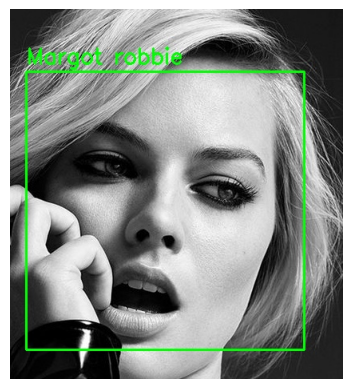

In [20]:

output_image_path = 'prediction/ test 19.jpg'
cv2.imwrite(output_image_path, original_image)

output_image = Image.open(output_image_path)
plt.imshow(output_image)
plt.axis('off')
plt.show()





In [21]:
print(prediction)
accuracy = cnn.evaluate(test_set)[1]  
print('Accuracy:', accuracy)

Margot robbie
8/8 [==============================] - 0s 37ms/step - loss: 0.1286 - accuracy: 0.9608
Accuracy: 0.9607843160629272
